In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from tqdm import tqdm

from matplotlib_venn import venn3

In [2]:
import sys
sys.path.append('../../code')

from splits import get_lo_split, set_cluster_columns

In [3]:
drd2 = pd.read_csv('../../data/raw/drd2_lo.csv', index_col=0)
drd2

,smiles,value
0,Brc1ccc(-[n+]2cc[n+](Cc3ccccc3)cc2)c2cc[nH]c12,7.717691
1,Brc1ccc(CNCCN2CCN(Cc3cc4ccccc4[nH]3)CC2)cc1,5.283913
2,Brc1ccc(N2CCN(Cc3ccccc3)CC2)c2cc[nH]c12,7.437357
3,Brc1ccc(NCCN2CCN(CCc3c[nH]c4ccccc34)CC2)cc1,7.288705
4,Brc1ccc(NCCN2CCN(Cc3cc4ccccc4[nH]3)CC2)cc1,6.035740
...,...,...
5414,c1cnc(N2CCN(CCCOc3ccc(-c4nc5ccccc5[nH]4)cc3)CC...,6.568636
5415,c1cnc(N2CCN(CCCOc3ccc(-c4nc5ccccc5o4)cc3)CC2)nc1,6.701147
5416,c1cnc(N2CCN(CCCSc3nc4ccccc4s3)CC2)nc1,6.273273
5417,c1cnc(N2CCN(Cc3c[nH]c4ncccc34)CC2)nc1,5.931443


In [21]:
splits = []

smiles = np.array(drd2['smiles'].to_list())
values = np.array(drd2['value'].to_list())

for i in tqdm(range(3)):
    idx = np.arange(len(smiles))
    np.random.seed(i)
    np.random.shuffle(idx)

    shuffled_smiles = smiles[idx]
    shuffled_values = values[idx]
    cluster_smiles, train_smiles = get_lo_split(shuffled_smiles, 0.4, 5, 50, shuffled_values, std_threshold=0.60)
    split = set_cluster_columns(drd2, cluster_smiles, train_smiles)
    splits.append(split)

100%|██████████| 3/3 [09:04<00:00, 181.47s/it]


In [22]:
sum([len(x) for x in cluster_smiles])

262

In [23]:
len(train_smiles)

2257

(array([2., 0., 0., 0., 1., 0., 0., 1., 1., 0., 3., 4., 4., 2., 3., 1., 1.,
        6., 3., 1., 3., 2., 2., 0., 0., 1., 0., 4., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.44089461, 0.46488575, 0.4888769 , 0.51286804, 0.53685919,
        0.56085033, 0.58484148, 0.60883262, 0.63282377, 0.65681491,
        0.68080606, 0.7047972 , 0.72878835, 0.75277949, 0.77677064,
        0.80076178, 0.82475293, 0.84874407, 0.87273522, 0.89672636,
        0.92071751, 0.94470866, 0.9686998 , 0.99269095, 1.01668209,
        1.04067324, 1.06466438, 1.08865553, 1.11264667, 1.13663782,
        1.16062896, 1.18462011, 1.20861125, 1.2326024 , 1.25659354,
        1.28058469, 1.30457583, 1.32856698, 1.35255812, 1.37654927,
        1.40054041, 1.42453156, 1.4485227 , 1.47251385, 1.496505  ,
        1.52049614, 1.54448729, 1.56847843, 1.59246958, 1.61646072,
        1.64045187]),
 <BarContainer object of 50 artists>)

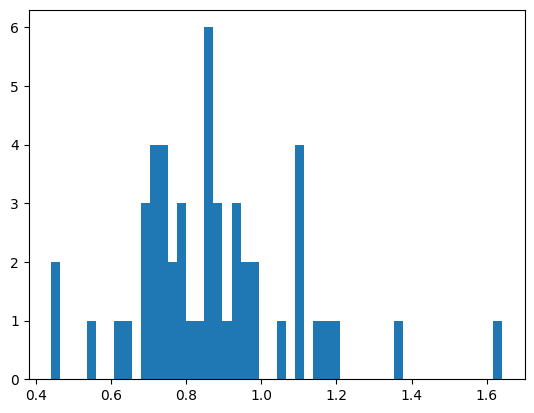

In [26]:
split = splits[2]

per_cluster_std = []
for i in range(split['cluster'].max()):
    cluster = split[split['cluster'] == i]
    std = cluster['value'].std()
    per_cluster_std.append(std)
plt.hist(per_cluster_std, bins=50)

In [27]:
data = splits[0]
test_0 = data[data['cluster'] != 0]['smiles'].to_list()

data = splits[1]
test_1 = data[data['cluster'] != 0]['smiles'].to_list()

data = splits[2]
test_2 = data[data['cluster'] != 0]['smiles'].to_list()

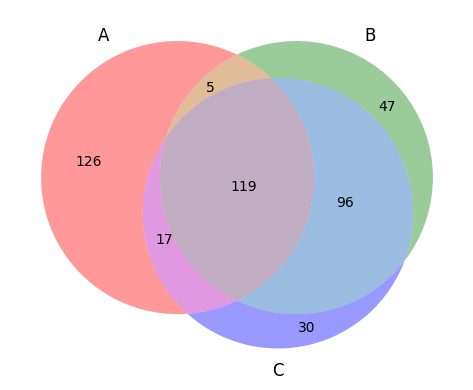

In [28]:
venn3([
    set(test_0),
    set(test_1),
    set(test_2),
])

In [29]:
data = splits[0]
is_train = data['cluster'] == 0
train_0 = data[is_train].reset_index(drop=True)
train_0.to_csv('../../data/lo/drd2/train_1.csv')
test_0 = data[~is_train].reset_index(drop=True)
test_0.to_csv('../../data/lo/drd2/test_1.csv')

(array([37.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  4.]),
 array([5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ]),
 <BarContainer object of 10 artists>)

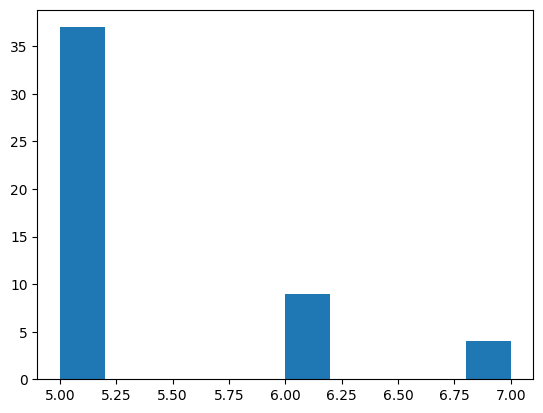

In [30]:
plt.hist(test_0['cluster'].value_counts())

In [31]:
data = splits[1]
is_train = data['cluster'] == 0
train_1 = data[is_train].reset_index(drop=True)
train_1.to_csv('../../data/lo/drd2/train_2.csv')
test_1 = data[~is_train].reset_index(drop=True)
test_1.to_csv('../../data/lo/drd2/test_2.csv')

In [32]:
data = splits[2]
is_train = data['cluster'] == 0
train_2 = data[is_train].reset_index(drop=True)
train_2.to_csv('../../data/lo/drd2/train_3.csv')
test_2 = data[~is_train].reset_index(drop=True)
test_2.to_csv('../../data/lo/drd2/test_3.csv')

# t-SNE

In [33]:
mols = [Chem.MolFromSmiles(smile) for smile in data['smiles']]
fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, 1024) for x in mols]

In [34]:
fps_np = []
for f in fps:
    fps_np.append(np.array(f))
fps_np = np.array(fps_np)

In [35]:
from sklearn import manifold

sr_tsne = manifold.TSNE(n_components=2, perplexity=40, random_state=0).fit_transform(
    fps_np
)

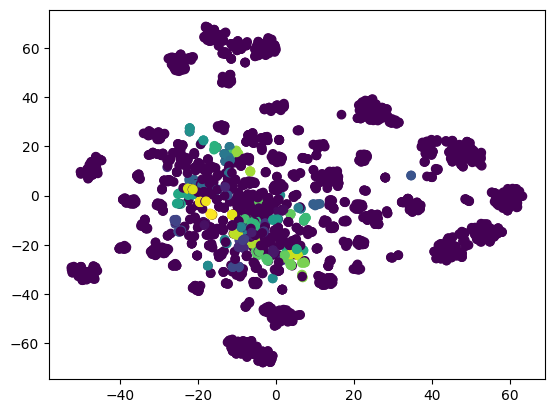

In [36]:
plt.scatter(sr_tsne[:, 0], sr_tsne[:, 1], c=data['cluster'])